## 엔터사 주식 상관관계 분석

엔터사의 소속 가수의 컴백과 해당 엔터사 주식이 상관관계가 있는지를 분석 하고자 한다.

- 과정
1. 주식 데이터 크롤링
2. 소속 가수 컴백 날짜 크롤링
3. 주식과 소속 가수 컴백과의 상관관계 분석

### 1. 주식 크롤링

- 파이썬의 FinanceDataReader 라이브러리를 통해 jyp, sm, yg, hybe의 주식 데이터를 수집하고자 한다.
- 하이브 엔터테이먼트사의 주식 상장일이 2020-10-15 이므로, 해당 날짜부터 현재인 2023-05-25 까지 종가('Close') 데이터를 수집한다. 

In [44]:
import FinanceDataReader as fdr
import pandas as pd

In [45]:
# 주식 종목 코드로 종가 데이터를 추출하여 stocks_df 에 저장하는 함수
def create_stocks_df(stocks):
    start_date = '2020-10-15'
    end_date = '2023-05-25'

    stock_df = fdr.DataReader(stock_code_list[stocks], start_date, end_date)
    stocks_df[stocks] = stock_df['Close'] # 날짜별 종가 추출

    return stocks_df

In [46]:
# stocks_df 생성
stock_code_list = {'HYBE':'352820', 'JYP':'035900', 'SM':'041510', 'YG':'122870'}
stocks_df = pd.DataFrame()

for stocks in stock_code_list.keys():
    create_stocks_df(stocks)

stocks_df

,HYBE,JYP,SM,YG
Date,,,,
2020-10-15,255420,34050,31850,44900
2020-10-16,198495,34550,30850,43850
2020-10-19,187110,33500,30400,42650
2020-10-20,180675,33400,30400,42950
2020-10-21,177210,33800,31200,42600
...,...,...,...,...
2023-05-19,281000,115700,107600,92000
2023-05-22,269000,114100,106900,90800
2023-05-23,273000,115700,108100,92800


In [19]:
stocks_df.describe()

,HYBE,JYP,SM,YG
count,647.000000,647.000000,647.000000,647.000000
mean,230021.159196,51995.131376,65328.361669,53243.972179
std,67484.297985,15699.273423,24490.908374,8767.181847
min,109500.000000,30550.000000,28100.000000,38700.000000
25%,172750.000000,39500.000000,46475.000000,46025.000000
50%,228690.000000,50200.000000,68200.000000,52700.000000
75%,283500.000000,60300.000000,76450.000000,57500.000000
max,414000.000000,119800.000000,158500.000000,92800.000000


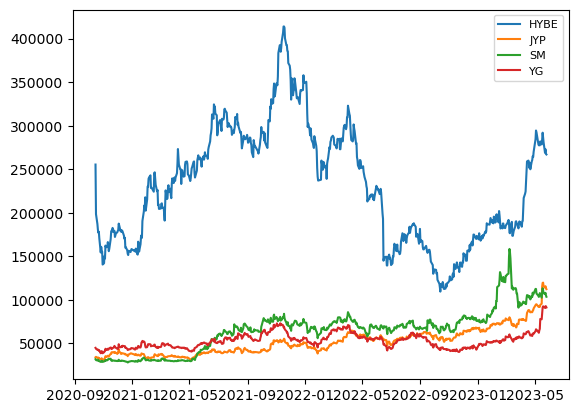

In [21]:
import matplotlib.pyplot as plt

plt.plot(stocks_df)
plt.legend(stock_code_list.keys(), fontsize = 8)

In [24]:
stocks_df.to_csv('data/stock.csv')

### 수정 1

stock 테이블의 date는 주가가 있는 날 (주말 및 공휴일 제외)에만 데이터가 있기 때문에 album 테이블의 release_date가 참조할 컬럼이 없어 db에 insert 시 오류가 난다. 때문에, 전반적인 ERD 수정을 하여 stock 테이블을 다시 구성하였다.

- stock: company_name, date, price

In [66]:
# 주식 종목 코드로 종가 데이터를 추출하여 stocks_df 에 저장하는 함수
start_date = '2020-10-15'
end_date = '2023-05-26'

df = fdr.DataReader(stock_code_list['HYBE'], start_date, end_date)
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-10-15,267300,347490,250965,255420,6557212,NaN
2020-10-16,250469,250469,197010,198495,4504395,-0.222868
2020-10-19,196515,200475,185129,187110,1977996,-0.057357
2020-10-20,188100,191565,174240,180675,1811616,-0.034392
2020-10-21,178695,183645,175230,177210,1658643,-0.019178
...,...,...,...,...,...,...
2023-05-22,281000,281000,261000,269000,483751,-0.042705
2023-05-23,271000,273500,267500,273000,236713,0.014870
2023-05-24,278000,278500,263500,267500,309525,-0.020147


In [67]:
df.reset_index(inplace=True)
df['Date']

0     2020-10-15
1     2020-10-16
2     2020-10-19
3     2020-10-20
4     2020-10-21
         ...    
643   2023-05-22
644   2023-05-23
645   2023-05-24
646   2023-05-25
647   2023-05-26
Name: Date, Length: 648, dtype: datetime64[ns]

In [68]:
import numpy as np
stock_df = pd.DataFrame()
stock_df['agency_name'] = ['HYBE' for _ in range(len(df))]
stock_df['date'] = df['Date']
stock_df['stock_price'] = df['Close']
stock_df

,agency_name,date,stock_price
0,HYBE,2020-10-15,255420
1,HYBE,2020-10-16,198495
2,HYBE,2020-10-19,187110
3,HYBE,2020-10-20,180675
4,HYBE,2020-10-21,177210
...,...,...,...
643,HYBE,2023-05-22,269000
644,HYBE,2023-05-23,273000
645,HYBE,2023-05-24,267500
646,HYBE,2023-05-25,267000


In [69]:
stock_df.to_csv('data/hybe_stock.csv', index=False)